In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

contexts = ['CpG', 'CHG', 'CHH']

base_dir = "/home/eharpu/shannon/temperatureComp/testSampleCSVs"

def process_context(context):
    context_dir = os.path.join(base_dir, context)
    
    print(f"Accessing directory: {context_dir}")
    
    all_files = [f for f in os.listdir(context_dir) if f.endswith('.csv')]
    
    print(f"Found files: {all_files}")
    
    if not all_files:
        print(f"No CSV files found in {context_dir}")
        return
    
    df_list = []
    for file in all_files:
        file_path = os.path.join(context_dir, file)
        df = pd.read_csv(file_path, sep = "\t")
        df_list.append(df)
    
    combined_df = pd.concat(df_list, ignore_index=True)
    
    combined_df['Methylation_Percentage'] = combined_df['m'] / (combined_df['m'] + combined_df['um'])
    return combined_df

dfs = []
for context in contexts:
    df = process_context(context)
    dfs.append(df)


Accessing directory: /home/eharpu/shannon/temperatureComp/testSampleCSVs/CpG
Found files: ['output_CpG_4.csv', 'output_CpG_2.csv', 'output_CpG_3.csv', 'output_CpG_Pt.csv', 'output_CpG_Mt.csv', 'output_CpG_1.csv', 'output_CpG_5.csv']
Accessing directory: /home/eharpu/shannon/temperatureComp/testSampleCSVs/CHG
Found files: ['output_CHG_4.csv', 'output_CHG_1.csv', 'output_CHG_Pt.csv', 'output_CHG_3.csv', 'output_CHG_5.csv', 'output_CHG_Mt.csv', 'output_CHG_2.csv']
Accessing directory: /home/eharpu/shannon/temperatureComp/testSampleCSVs/CHH
Found files: ['output_CHH_3.csv', 'output_CHH_Pt.csv', 'output_CHH_1.csv', 'output_CHH_2.csv', 'output_CHH_Mt.csv', 'output_CHH_5.csv', 'output_CHH_4.csv']


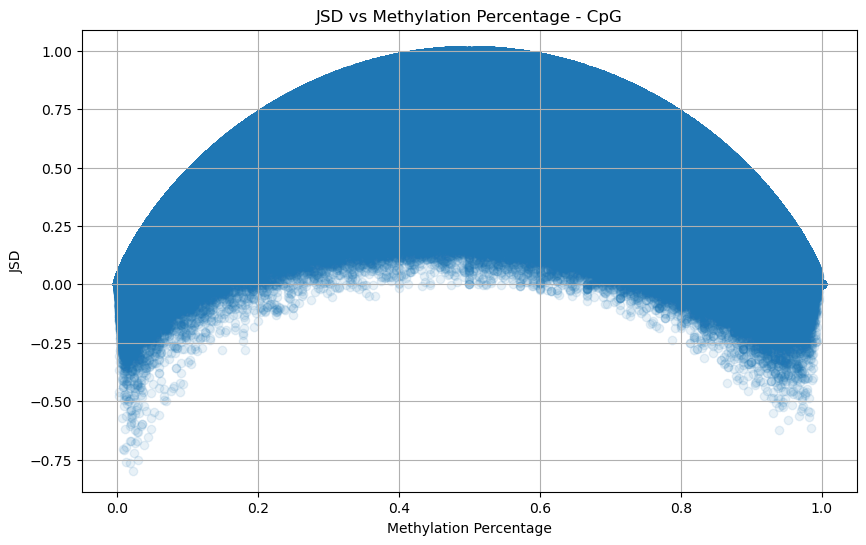

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(dfs[0]['Methylation_Percentage'], dfs[0]['JSD_bit_'], alpha=0.1)
plt.title(f'JSD vs Methylation Percentage - CpG')
plt.xlabel('Methylation Percentage')
plt.ylabel('JSD')
plt.grid(True)
plt.show()

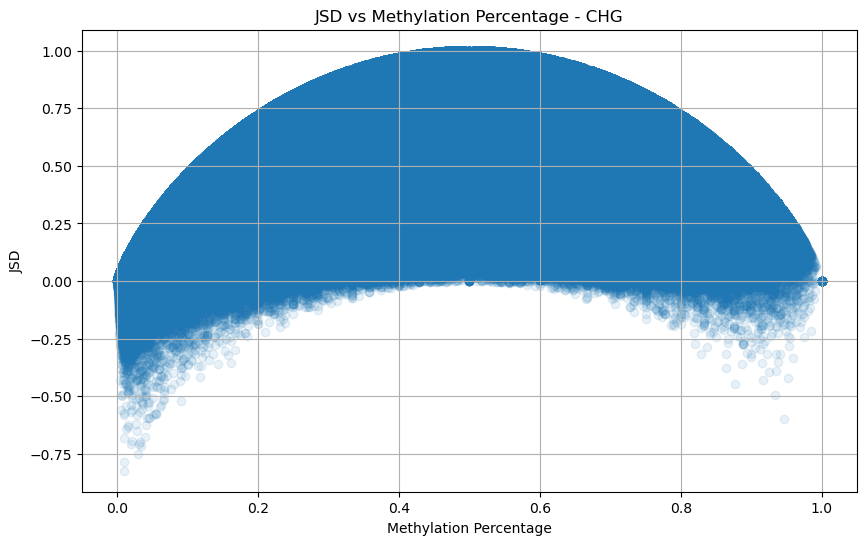

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(dfs[1]['Methylation_Percentage'], dfs[1]['JSD_bit_'], alpha=0.1)
plt.title(f'JSD vs Methylation Percentage - CHG')
plt.xlabel('Methylation Percentage')
plt.ylabel('JSD')
plt.grid(True)
plt.show()

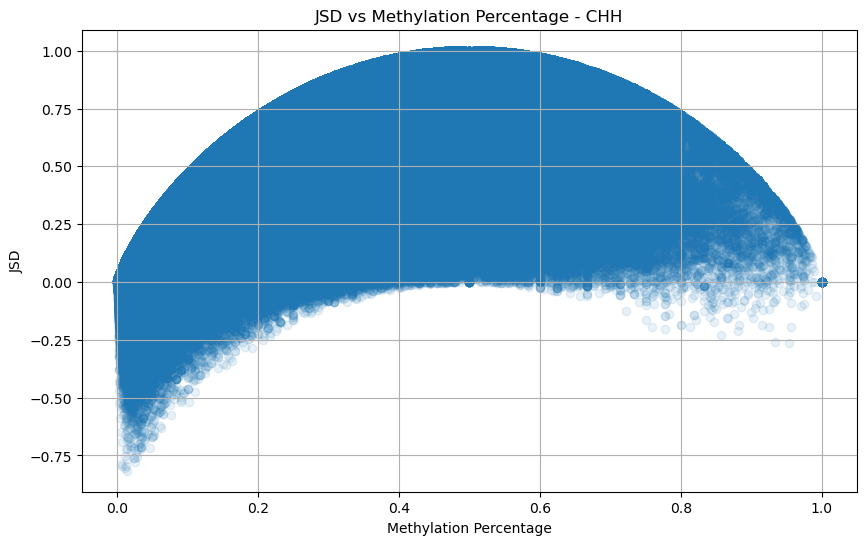

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(dfs[2]['Methylation_Percentage'], dfs[2]['JSD_bit_'], alpha=0.1)
plt.title(f'JSD vs Methylation Percentage - CHH')
plt.xlabel('Methylation Percentage')
plt.ylabel('JSD')
plt.grid(True)
plt.show()

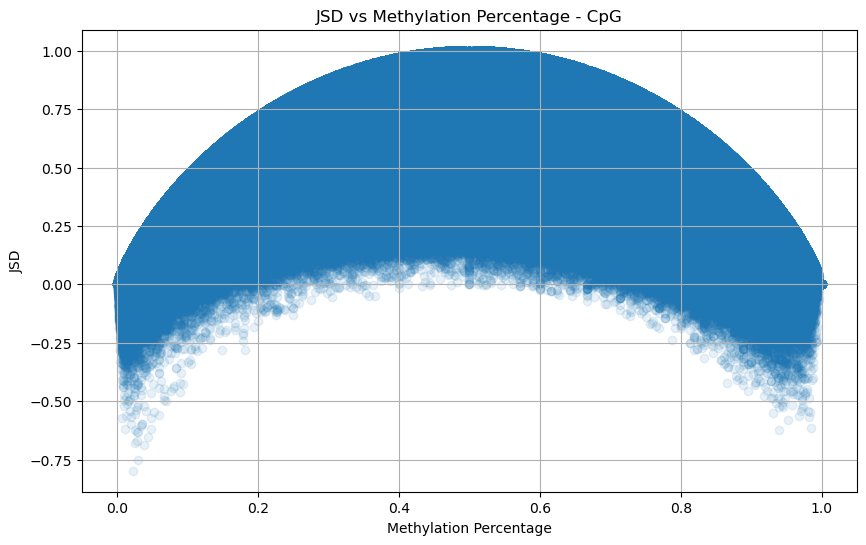

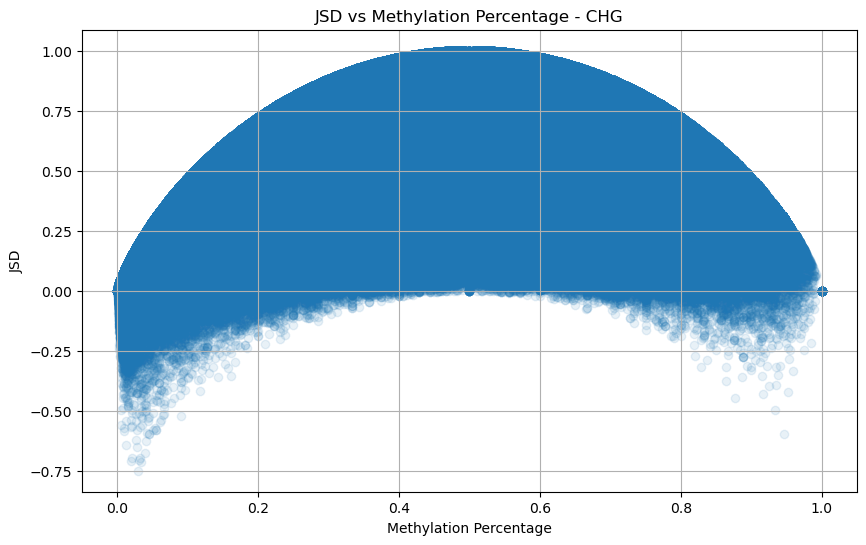

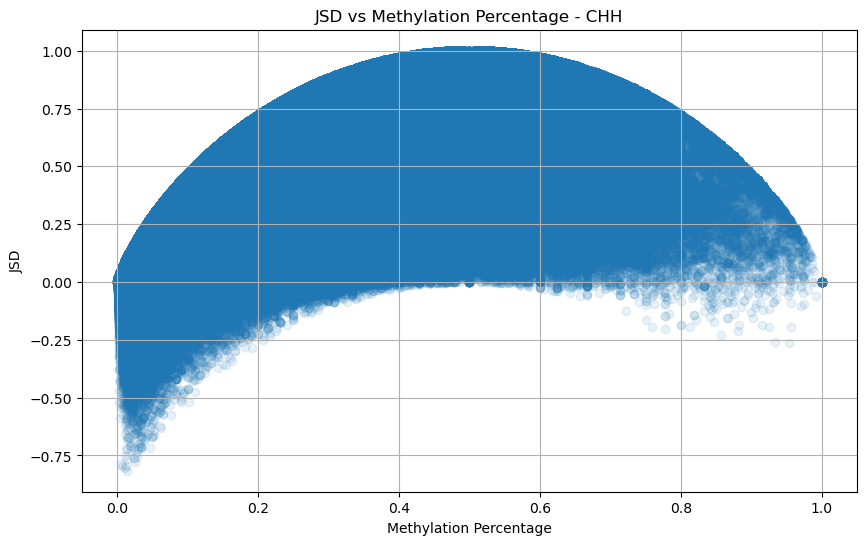

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

contexts = ['CpG', 'CHG', 'CHH']

base_dir = "/home/eharpu/shannon/temperatureComp/testSampleCSVs"

def process_context(context):
    context_dir = os.path.join(base_dir, context)
    
    all_files = [f for f in os.listdir(context_dir) if f.endswith('.csv') and any(f'_{chrom}.csv' in f for chrom in range(1, 6))]
    if not all_files:
        print(f"No CSV files found in {context_dir} for chromosomes 1-5")
        return
    
    df_list = []
    for file in all_files:
        file_path = os.path.join(context_dir, file)
        df = pd.read_csv(file_path, sep = "\t")
        df_list.append(df)
    
    combined_df = pd.concat(df_list, ignore_index=True)
    
    combined_df['Methylation_Percentage'] = combined_df['m'] / (combined_df['m'] + combined_df['um'])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(combined_df['Methylation_Percentage'], combined_df['JSD_bit_'], alpha=0.1)
    plt.title(f'JSD vs Methylation Percentage - {context}')
    plt.xlabel('Methylation Percentage')
    plt.ylabel('JSD')
    plt.grid(True)
    plt.show()

for context in contexts:
    process_context(context)


/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


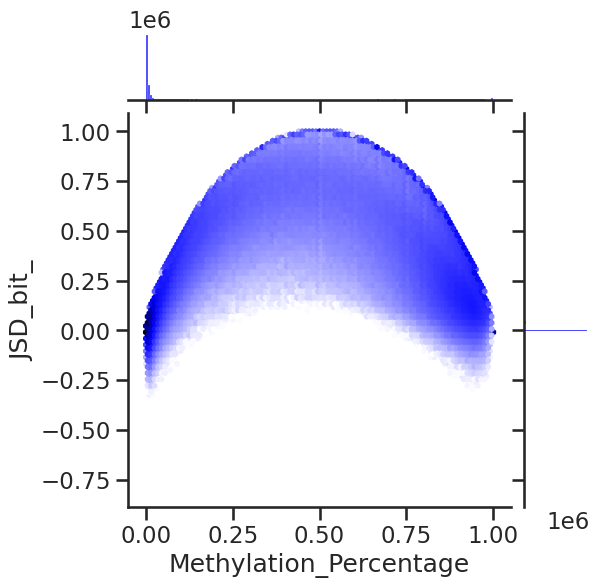

/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


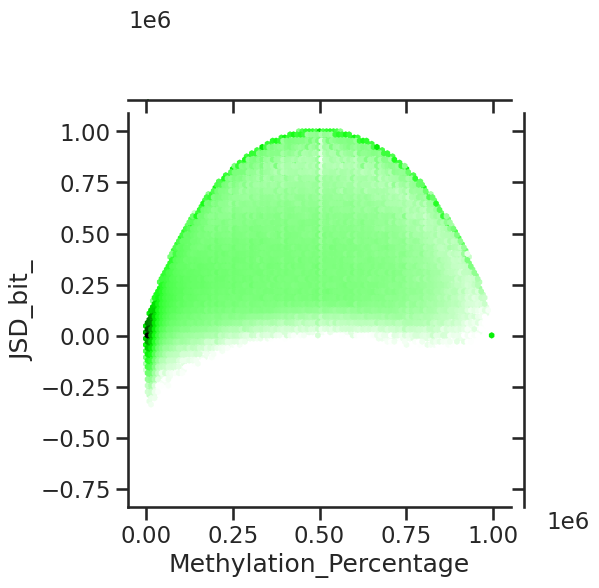

/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


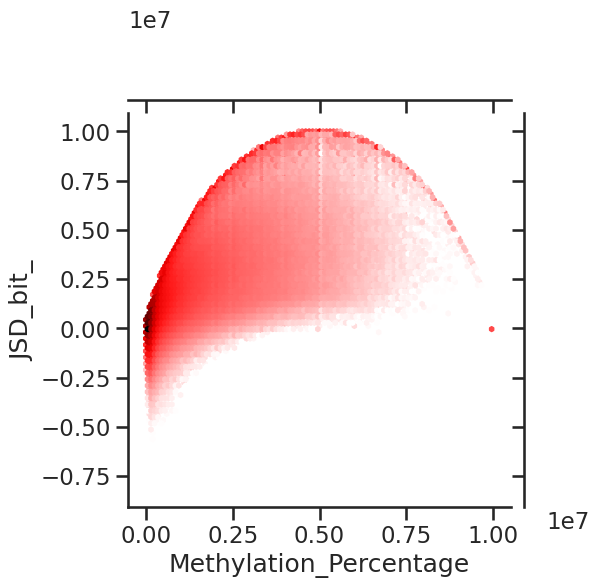

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='ticks')
sns.set_context('talk')

BINS = 'log'
GRIDSIZE = 100
MINCNT = 10
SPACE = 0

def plot_phase_plane(data, color):
    g = sns.jointplot(x='Methylation_Percentage', y='JSD_bit_', data=data, kind='hex',
                      color=color, joint_kws=dict(gridsize=GRIDSIZE, bins=BINS, mincnt=MINCNT))
    plt.show()

contexts = ['CpG', 'CHG', 'CHH']

base_dir = "/home/eharpu/shannon/temperatureComp/testSampleCSVs"

def process_context(context, color):
    context_dir = os.path.join(base_dir, context)
    
    all_files = [f for f in os.listdir(context_dir) if f.endswith('.csv') and any(f'_{chrom}.csv' in f for chrom in range(1, 6))]
    
    if not all_files:
        print(f"No CSV files found in {context_dir} for chromosomes 1-5")
        return
    
    df_list = []
    for file in all_files:
        file_path = os.path.join(context_dir, file)
        df = pd.read_csv(file_path, sep = "\t")
        df_list.append(df)
    
    combined_df = pd.concat(df_list, ignore_index=True)
    
    combined_df['Methylation_Percentage'] = combined_df['m'] / (combined_df['m'] + combined_df['um'])
    
    plot_phase_plane(combined_df, color)

context_colors = {'CpG': 'blue', 'CHG': 'green', 'CHH': 'red'}

for context in contexts:
    process_context(context, context_colors[context])


/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


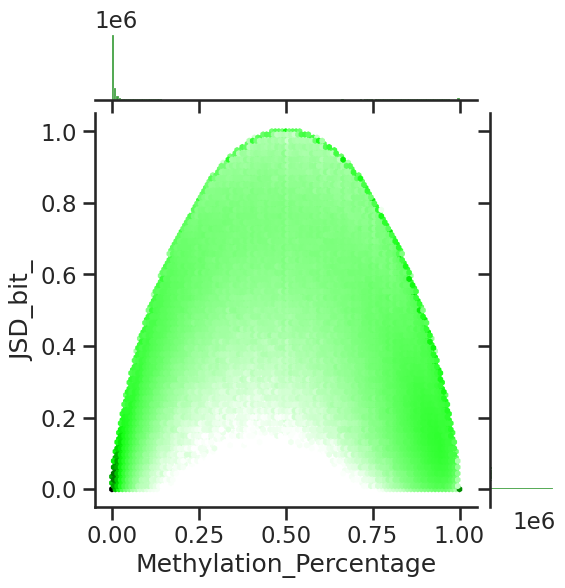

/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


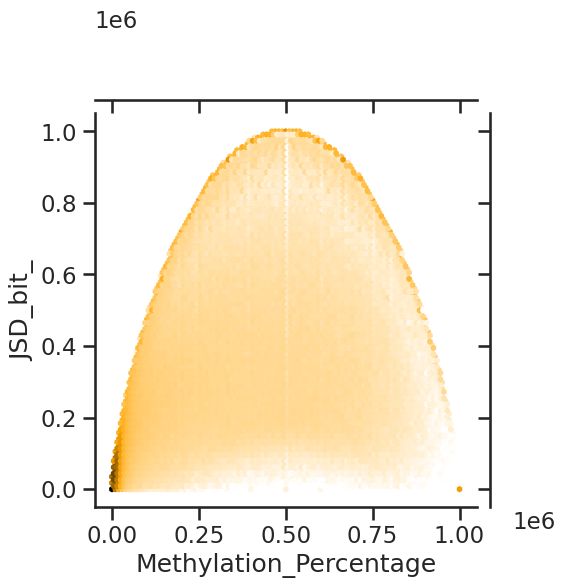

/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eharpu/data/conda/envs/environment_shannon/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


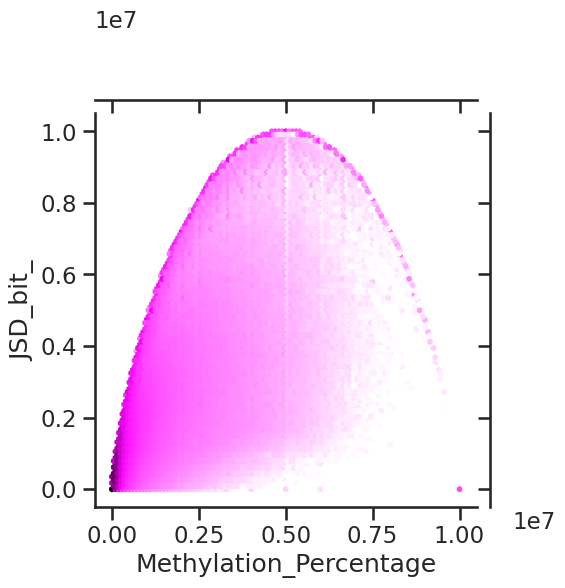

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='ticks')
sns.set_context('talk')

BINS = 'log'
GRIDSIZE = 100
MINCNT = 10
SPACE = 0

def plot_phase_plane(data, color):
    g = sns.jointplot(x='Methylation_Percentage', y='JSD_bit_', data=data, kind='hex',
                      color=color, joint_kws=dict(gridsize=GRIDSIZE, bins=BINS, mincnt=MINCNT))
    plt.show()

contexts = ['CpG', 'CHG', 'CHH']
base_dir = "/home/eharpu/shannon/temperatureComp/testSampleCSVs"

def process_context(context, color):
    context_dir = os.path.join(base_dir, context)
    all_files = [f for f in os.listdir(context_dir) if f.endswith('.csv') and any(f'_{chrom}.csv' in f for chrom in range(1, 6))]
    df_list = []
    for file in all_files:
        file_path = os.path.join(context_dir, file)
        df = pd.read_csv(file_path, sep = "\t")
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df = combined_df[combined_df['JSD_bit_'] >= 0]
    combined_df['Methylation_Percentage'] = combined_df['m'] / (combined_df['m'] + combined_df['um'])
    plot_phase_plane(combined_df, color)
context_colors = {'CpG': 'green', 'CHG': 'orange', 'CHH': 'purple'}
for context in contexts:
    process_context(context, context_colors[context])
